### Parabolic sar reversal strategy

In [20]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

### Import CSV

In [29]:
data = pd.read_csv('AUDUSD_15m.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
11930,2022-04-29 16:45:00+01:00,0.710424,0.711288,0.710252,0.710308,0.710308,0
11931,2022-04-29 17:00:00+01:00,0.710252,0.710252,0.709084,0.709210,0.709210,0
11932,2022-04-29 17:15:00+01:00,0.709144,0.709824,0.709144,0.709310,0.709310,0
11933,2022-04-29 17:30:00+01:00,0.709215,0.709320,0.708843,0.709044,0.709044,0
11934,2022-04-29 17:45:00+01:00,0.709134,0.709471,0.708205,0.708386,0.708386,0


In [30]:
df = data.copy()

### Create strategy

In [31]:
parabolic_sar = ta.Strategy(
    name = 'Parabolic Sar',
    description = 'Parabolic Sar Reversal',
    ta = [
        {'kind': 'psar', 'af0': 0.02, 'af':0.02, 'max_af':0.2},
        {'kind': 'ema', 'length': 200},
        {'kind': 'atr', 'length': 14}
    ]
)
df.ta.strategy(parabolic_sar)
df

,timestamp,open,high,low,close,adj close,volumn,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,EMA_200,ATRr_14
0,2021-11-04 17:00:00+00:00,0.739776,0.739973,0.739536,0.739919,0.739919,0,NaN,NaN,0.02,0,NaN,NaN
1,2021-11-04 17:15:00+00:00,0.739793,0.740192,0.739661,0.739776,0.739776,0,0.708205,NaN,0.04,0,NaN,NaN
2,2021-11-04 17:30:00+00:00,0.739826,0.739973,0.739486,0.739919,0.739919,0,0.709485,NaN,0.04,0,NaN,NaN
3,2021-11-04 17:45:00+00:00,0.739722,0.739973,0.739322,0.739656,0.739656,0,0.710713,NaN,0.04,0,NaN,NaN
4,2021-11-04 18:00:00+00:00,0.739738,0.739919,0.739497,0.739864,0.739864,0,0.711892,NaN,0.04,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,2022-04-29 16:45:00+01:00,0.710424,0.711288,0.710252,0.710308,0.710308,0,NaN,0.713403,0.18,0,0.713420,0.001238
11931,2022-04-29 17:00:00+01:00,0.710252,0.710252,0.709084,0.709210,0.709210,0,NaN,0.712684,0.20,0,0.713378,0.001237
11932,2022-04-29 17:15:00+01:00,0.709144,0.709824,0.709144,0.709310,0.709310,0,NaN,0.711964,0.20,0,0.713338,0.001197
11933,2022-04-29 17:30:00+01:00,0.709215,0.709320,0.708843,0.709044,0.709044,0,NaN,0.711388,0.20,0,0.713295,0.001146


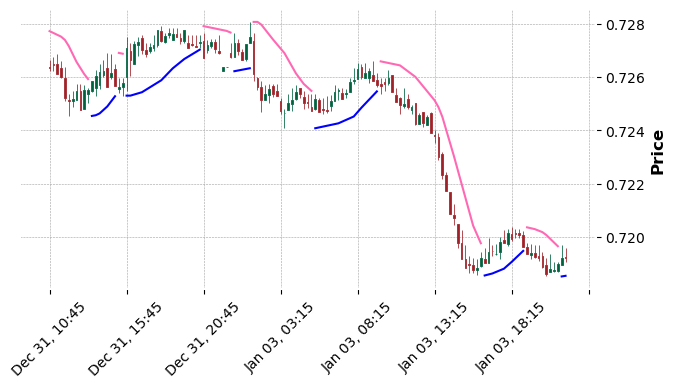

In [32]:
data_test = df.copy()
new_timestamp = data_test['timestamp'].str.split('+', n = 1, expand = True)
data_test['timestamp'] = new_timestamp[0]
data_test['timestamp'] = pd.to_datetime(data_test['timestamp'])
data_test.set_index('timestamp', inplace = True)

psar1 = data_test['PSARl_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
psar2 = data_test['PSARs_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
psar3 = data_test['PSARaf_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
psar4 = data_test['PSARr_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']

data_test_plot = data_test.loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']

psar1_plot = mpf.make_addplot(psar1, panel=0, color='blue', width=1.5)
psar2_plot = mpf.make_addplot(psar2, panel=0, color='hotpink', width=1.5)
# psar3_plot = mpf.make_addplot(psar3, panel=0, color='green', width=1.5)
# psar4_plot = mpf.make_addplot(psar4, panel=0, color='blue', width=1.5)

mpf.plot(data_test_plot, 
         type='candle', style='charles',
         addplot=[
             psar1_plot, 
             psar2_plot
#              psar3_plot 
#              psar4_plot
         ],
         figsize=(8, 4))

In [33]:
# df[df['PSARs_0.02_0.2'].notnull()]
df[~np.isnan(df['PSARs_0.02_0.2'])]

,timestamp,open,high,low,close,adj close,volumn,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,EMA_200,ATRr_14
28,2021-11-05 00:00:00+00:00,1.350858,1.350858,1.349418,1.349801,1.349801,0,NaN,1.350858,0.02,1,NaN,0.000656
29,2021-11-05 00:15:00+00:00,1.349801,1.350384,1.349801,1.350165,1.350165,0,NaN,1.350858,0.02,0,NaN,0.000650
30,2021-11-05 00:30:00+00:00,1.350165,1.350165,1.348891,1.349382,1.349382,0,NaN,1.350858,0.04,0,NaN,0.000700
31,2021-11-05 00:45:00+00:00,1.349437,1.349947,1.349437,1.349947,1.349947,0,NaN,1.350780,0.04,0,NaN,0.000690
32,2021-11-05 01:00:00+00:00,1.349418,1.349837,1.349018,1.349018,1.349018,0,NaN,1.350704,0.04,0,NaN,0.000709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,2022-04-29 14:30:00+01:00,1.255036,1.255272,1.254076,1.254752,1.254752,0,NaN,1.257411,0.04,0,1.253142,0.001347
11912,2022-04-29 14:45:00+01:00,1.254406,1.255666,1.254044,1.255666,1.255666,0,NaN,1.257253,0.04,0,1.253167,0.001367
11913,2022-04-29 15:00:00+01:00,1.255808,1.255840,1.254453,1.255052,1.255052,0,NaN,1.257101,0.04,0,1.253186,0.001368
11914,2022-04-29 15:15:00+01:00,1.255115,1.255115,1.253274,1.253274,1.253274,0,NaN,1.256956,0.06,0,1.253187,0.001402


### Create Signal

In [33]:
class BacktestParabolicSarReversal:
    def __init__(self, params):
        self.orders = pd.DataFrame(columns = ['action', 'open time', 'open', 'close time', 'close', 'T/P', 'S/L', 'result'])
        self.order = {'action': None, 'open time': None, 'open': None, 'close time': None, \
                      'close': None, 'T/P': None, 'S/L': None,'result': None}
        self.unknow_result = []
        
        self.current_action = 'close'
        self.atr = params['atr']
        self.ema = params['ema']
        self.psar = params['psar']
        
        self.pip_value = params['pip_value']
        self.rr = params['rr']
        self.df = params['df']
        self.plot = params['plot']
        
    def reset_order(self):
        self.order = {'action': None, 'open time': None, 'open': None, 'close time': None, \
                      'close': None, 'T/P': None, 'S/L': None,'result': None}
        
    def get_df(self):
        return self.df
        
    def plot_order(self, order):
        pass
        
    def backtest(self):
        parabolic_sar = ta.Strategy(
            name = 'Parabolic Sar',
            description = 'Parabolic Sar Reversal',
            ta = [
                {'kind': 'psar', 'af0': self.psar, 'af': self.psar, 'max_af': self.psar*10},
                {'kind': 'ema', 'length': self.ema},
                {'kind': 'atr', 'length': self.atr}
            ]
        )
        self.df.ta.strategy(parabolic_sar)
#         self.df = self.df.copy().dropna()
        self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])
        self.df['action'] = None
        
        self.df['entries'] = False
        self.df['exits'] = False
        self.df['short_entries'] = False
        self.df['short_exits'] = False
        self.df['price_action'] = self.df['close']
        
        for index, row in self.df.iterrows():
            entry = 0
            
            if self.current_action == 'close' and index > 0:
                
                if ~np.isnan(row['PSARl_'+str(self.psar)+'_'+str(self.psar*10)]) and \
                    ~np.isnan(self.df.at[index-1, 'PSARs_'+str(self.psar)+'_'+str(self.psar*10)]) and \
                    (row['close'] > row['EMA_'+str(self.ema)]):
                    
                    self.df.at[index, 'action'] = 'buy'
                    self.df.at[index, 'entries'] = True
                    self.df.at[index, 'price_action'] = row['open']
                    self.order['action'] = 'buy'
                                
                    self.order['open time'] = row['timestamp']
                    self.order['open'] = row['open']
                    self.order['S/L'] = row['open'] - row['ATRr_'+str(self.atr)]
                    self.order['T/P'] = row['open'] + (self.rr * abs(row['open'] - self.order['S/L']))
                    self.current_action = 'buy'
                    
                elif ~np.isnan(row['PSARs_'+str(self.psar)+'_'+str(self.psar*10)]) and \
                    ~np.isnan(self.df.at[index-1, 'PSARl_'+str(self.psar)+'_'+str(self.psar*10)]) and \
                    (row['close'] < row['EMA_'+str(self.ema)]):
            
                    self.df.at[index, 'action'] = 'sell'
                    self.df.at[index, 'short_entries'] = True
                    self.df.at[index, 'price_action'] = row['open']
                    self.order['action'] = 'sell'
                                
                    self.order['open time'] = row['timestamp']
                    self.order['open'] = row['open']
                    self.order['S/L'] = row['open'] + row['ATRr_'+str(self.atr)]
                    self.order['T/P'] = row['open'] - (self.rr * abs(row['open'] - self.order['S/L']))
                    self.current_action = 'sell'
        
            if self.current_action == 'buy':
                if row['low'] <= self.order['S/L'] and row['high'] >= self.order['T/P']:
                    self.unknow_result.append(row)
                    
                if row['low'] <= self.order['S/L']:
                    self.df.at[index, 'exits'] = True
                    self.df.at[index, 'price_action'] = row['low']
                    
                    self.order['result'] = 'S/L'
                    self.order['close time'] = row['timestamp']
                    self.order['close'] = self.order['S/L']
                    
                    self.current_action = 'close'
                    self.orders = self.orders.append(self.order, ignore_index = True)
                    if self.plot == True: self.plot_order(self.order)
                    self.reset_order()
                    
                elif row['high'] >= self.order['T/P']:
                    self.df.at[index, 'exits'] = True
                    self.df.at[index, 'price_action'] = row['high']
                    
                    self.order['result'] = 'T/P'
                    self.order['close time'] = row['timestamp']
                    self.order['close'] = self.order['T/P']
                    
                    self.current_action = 'close'
                    self.orders = self.orders.append(self.order, ignore_index = True)
                    if self.plot == True: self.plot_order(self.order)
                    self.reset_order()

            elif self.current_action == 'sell':
                if row['high'] >= self.order['S/L'] and row['low'] <= self.order['T/P']:
                    self.unknow_result.append(row)
                    
                if row['high'] >= self.order['S/L']:
                    self.df.at[index, 'short_exits'] = True
                    self.df.at[index, 'price_action'] = row['high']
                    
                    self.order['result'] = 'S/L'
                    self.order['close time'] = row['timestamp']
                    self.order['close'] = self.order['S/L']
                    
                    self.current_action = 'close'
                    self.orders = self.orders.append(self.order, ignore_index = True)
                    if self.plot == True: self.plot_order(self.order)
                    self.reset_order()
                    
                elif row['low'] <= self.order['T/P']:
                    self.df.at[index, 'short_exits'] = True
                    self.df.at[index, 'price_action'] = row['low']
                    
                    self.order['result'] = 'T/P'
                    self.order['close time'] = row['timestamp']
                    self.order['close'] = self.order['T/P']
                    
                    self.current_action = 'close'
                    self.orders = self.orders.append(self.order, ignore_index = True)
                    if self.plot == True: self.plot_order(self.order)
                    self.reset_order()

        try:
            win_rate = round(len(self.orders[self.orders['result'] == 'T/P']) * 100 / len(self.orders), 2)
            loss_rate = round(len(self.orders[self.orders['result'] == 'S/L']) * 100 / len(self.orders), 2)

            win_orders = int((win_rate * len(self.orders)) / 100 )
            loss_orders = len(self.orders) - win_orders
            gain = (win_orders * self.rr) - loss_orders

            result_info = f"total orders: {len(self.orders)}\npsar: {self.psar}, ema: {self.ema}, atr: {self.atr}, gain: {gain}\n"
            return {'win_rate': win_rate, 'info': result_info, 'total_order': len(self.orders), 'rr': self.rr, 'gain': gain, 'unknow': self.unknow_result}
        except:
    #         print("No orders to action")
            return {'win_rate': 0, 'info': 'No orders to action'}

In [34]:
pair_test = BacktestParabolicSarReversal({
    'atr': 20,
    'psar': 0.01,
    'ema': 200,
    'pip_value': 0.001,
    'rr': 1.5,
    'plot': False,
    'df': df.copy()
})
pair_test.backtest()

{'win_rate': 64.52,
 'info': 'total orders: 341\npsar: 0.01, ema: 200, atr: 20, gain: 209.0\n',
 'total_order': 341,
 'rr': 1.5,
 'gain': 209.0,
 'unknow': [timestamp          2021-12-15 19:00:00+00:00
  open                                0.711187
  high                                0.714235
  low                                 0.709466
  close                               0.713587
  adj close                           0.713587
  volumn                                     0
  PSARl_0.02_0.2                           NaN
  PSARs_0.02_0.2                      0.714235
  PSARaf_0.02_0.2                         0.02
  PSARr_0.02_0.2                             1
  EMA_200                             0.712546
  ATRr_14                             0.000945
  PSARl_0.01_0.1                           NaN
  PSARs_0.01_0.1                      0.714235
  PSARaf_0.01_0.1                         0.01
  PSARr_0.01_0.1                             1
  ATRr_20                              0.00086

In [35]:
"""
Grid parameter example
psar : 0.01 -> 0.1
atr : 10 -> 30
"""
def create_grid_params(line1_start, line1_end, line2_start, line2_end):
    params = []
    for i in range(line1_start, line1_end+1):
        for j in range(line2_start, line2_end+1):
            params.append([i*0.01, j])
    return params
params_list = create_grid_params(1, 10, 10, 30)
len(params_list)

210

In [36]:
good_params = {'win': 0, 'info': ''}
start = 0
end = 210
win_start = 0

loop_num = start
for param in params_list[start:end]:
    obj = BacktestParabolicSarReversal({'psar': param[0], 'atr': param[1], 'ema': 200,'pip_value': 0.001, 'rr': 1.5, 'df': df.copy(), 'plot': False})
    result = obj.backtest()
    if result['win_rate'] > win_start and result['total_order'] > 120:
        win_start = result['win_rate']
        good_params['win'] = result['win_rate']
        good_params['info'] = result['info']
    loop_num = loop_num + 1
    print(f"run: {loop_num} to {end}", end = "\r")
    
print(f"\nwin rate: {good_params['win']} %\n{good_params['info']}")

run: 210 to 210
win rate: 64.52 %
total orders: 341
psar: 0.01, ema: 200, atr: 19, gain: 209.0



### GBPUSD

* win rate: 62.04 %
* total orders: 324
* psar: 0.01, ema: 200, atr: 25, gain: 178.5

### USDJPY

* win rate: 58.82 %
* total orders: 306
* psar: 0.01, ema: 200, atr: 25, gain: 141.5

### EURUSD

* win rate: 67.43 %
* total orders: 304
* psar: 0.01, ema: 200, atr: 17, gain: 206.0

### AUDUSD

* win rate: 64.52 %
* total orders: 341
* psar: 0.01, ema: 200, atr: 19, gain: 209.0